In [3]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


df = pd.read_csv("Arrival data.csv")

In [4]:
df = df.iloc[:,:4]
df

,Week,Day,Arrival,Adjusted Arrival
0,1,Weekday,08:01:26,00:01:26
1,1,Weekday,08:06:59,00:06:59
2,1,Weekday,08:11:07,00:11:07
3,1,Weekday,08:13:08,00:13:08
4,1,Weekday,08:13:56,00:13:56
...,...,...,...,...
42066,8,Sun,00:52:20,16:52:20
42067,8,Sun,00:53:12,16:53:12
42068,8,Sun,00:55:38,16:55:38
42069,8,Sun,00:58:41,16:58:41


In [5]:
weekday = df[df['Day']=='Weekday']
saturday = df[df['Day']=='Sat']
sunday = df[df['Day']=='Sun']

In [6]:
def DataManip(data):
    data['Arrival'] = pd.to_timedelta(data['Arrival'].astype(str))

    # Subtract 8 hours from each time to adjust the range from 0 to 17 hours
    data['Adjusted Arrival'] = data['Arrival'] - pd.Timedelta(hours=8)
    data['Adjusted Arrival'] = data['Adjusted Arrival'].apply(
        lambda x: x + pd.Timedelta(days=1) if x.total_seconds() < 0 else x)
    
    data = data.rename(columns={"Week ": "Day_Number", "Day": "Day_Type"})
    return data

# Function to calculate interarrival times
def calculate_interarrival(group):
    # Shift the 'Adjusted Arrival' column to get the difference with the previous row
    interarrival = group['Adjusted Arrival'].diff()

    # For the first row of each group, use the 'Adjusted Arrival' time itself
    interarrival.iloc[0] = group['Adjusted Arrival'].iloc[0]

    # Convert interarrival times to seconds
    return interarrival.dt.total_seconds()

weekday = DataManip(weekday)
weekday['Interarrival Time (sec)'] = weekday.groupby('Day_Number').apply(calculate_interarrival).reset_index(level=0, drop=True)

saturday = DataManip(saturday)
saturday['Interarrival Time (sec)'] = saturday.groupby('Day_Number').apply(calculate_interarrival).reset_index(level=0, drop=True)

sunday = DataManip(sunday)
sunday['Interarrival Time (sec)'] = sunday.groupby('Day_Number').apply(calculate_interarrival).reset_index(level=0, drop=True)


C:\Users\wesle\AppData\Local\Temp\ipykernel_14784\3593575078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Arrival'] = pd.to_timedelta(data['Arrival'].astype(str))
C:\Users\wesle\AppData\Local\Temp\ipykernel_14784\3593575078.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Adjusted Arrival'] = data['Arrival'] - pd.Timedelta(hours=8)
C:\Users\wesle\AppData\Local\Temp\ipykernel_14784\3593575078.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [58]:
weekday.columns

Index(['Day_Number', 'Day_Type', 'Arrival', 'Adjusted Arrival',
       'Interarrival Time (sec)'],
      dtype='object')

In [7]:
def calculate_lambda_per_hour(data):
    # Convert 'Arrival' to timedelta
    data['Adjusted Arrival'] = pd.to_timedelta(data['Adjusted Arrival'])

    # Extract hour from 'Arrival'
    data['Hour'] = data['Adjusted Arrival'].dt.components.hours
    # Initialize a dictionary to store lambda values for each hour
    lambda_per_hour = {hour: [] for hour in range(0, 17)}

    for hour in range(0, 17):
        hour_data = data[data['Hour'] == hour]
        if not hour_data.empty:
            mean_interarrival = hour_data['Interarrival Time (sec)'].mean()
            lambda_hour_day = 1 / mean_interarrival if mean_interarrival > 0 else 0
            lambda_per_hour[hour] = (lambda_hour_day)
            
    return lambda_per_hour



In [10]:
lambdas_weekday = calculate_lambda_per_hour(weekday)
lambdas_saturday = calculate_lambda_per_hour(saturday)
lambdas_sunday = calculate_lambda_per_hour(sunday)

print(lambdas_weekday)
print(lambdas_saturday)
print(lambdas_sunday)

{0: 0.0068923399057756055, 1: 0.012489186851211073, 2: 0.01747282005768804, 3: 0.021384928716904276, 4: 0.029444475337819048, 5: 0.02999693054664174, 6: 0.02802261766173291, 7: 0.02690670302456941, 8: 0.029087984915287135, 9: 0.031521799346296606, 10: 0.03793812142420708, 11: 0.032277044633100785, 12: 0.0254847339824034, 13: 0.0205412907702984, 14: 0.016585692745853576, 15: 0.009165311956948259, 16: 0.0061328396204582275}
{0: 0.009068989095620254, 1: 0.013320549258637812, 2: 0.018005635351522234, 3: 0.022464855059824887, 4: 0.028479144236446357, 5: 0.030553347388794803, 6: 0.03318928262748488, 7: 0.03141690229343387, 8: 0.035649882091829656, 9: 0.048036744137859584, 10: 0.05401272114281742, 11: 0.04758103699590477, 12: 0.0409652860236083, 13: 0.029995162070633772, 14: 0.02607212475633528, 15: 0.020913536572677142, 16: 0.012383793534064104}
{0: 0.008037773933102652, 1: 0.011509472397636993, 2: 0.018840579710144925, 3: 0.022264675234456407, 4: 0.029001148905058664, 5: 0.03102360567090713

In [8]:
weekday

,Day_Number,Day_Type,Arrival,Adjusted Arrival,Interarrival Time (sec)
0,1,Weekday,0 days 08:01:26,0 days 00:01:26,86.0
1,1,Weekday,0 days 08:06:59,0 days 00:06:59,333.0
2,1,Weekday,0 days 08:11:07,0 days 00:11:07,248.0
3,1,Weekday,0 days 08:13:08,0 days 00:13:08,121.0
4,1,Weekday,0 days 08:13:56,0 days 00:13:56,48.0
...,...,...,...,...,...
13715,10,Weekday,0 days 00:48:05,0 days 16:48:05,144.0
13716,10,Weekday,0 days 00:51:35,0 days 16:51:35,210.0
13717,10,Weekday,0 days 00:52:53,0 days 16:52:53,78.0
13718,10,Weekday,0 days 00:54:56,0 days 16:54:56,123.0


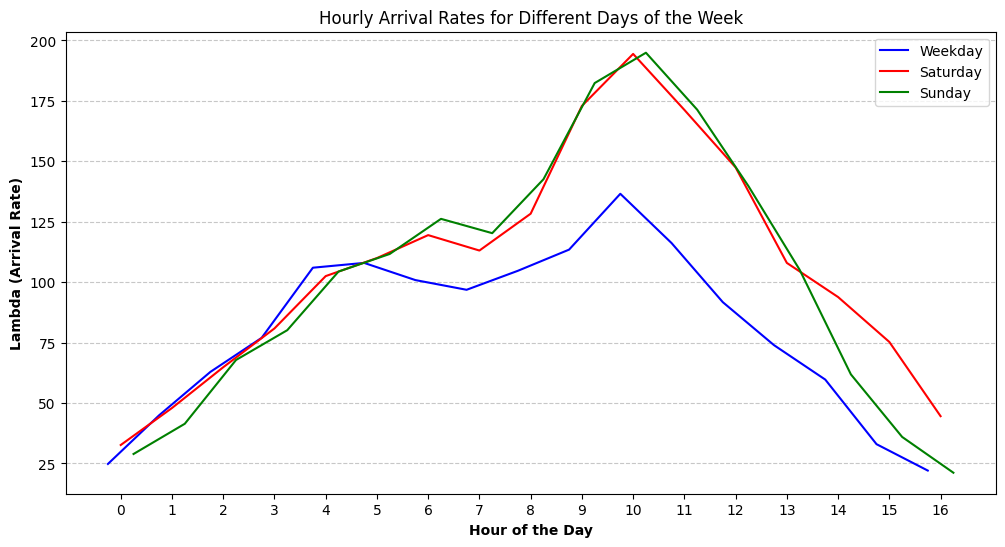

In [11]:
# Convert the dictionaries to DataFrames
df_weekday = pd.DataFrame(list(lambdas_weekday.items()), columns=['Hour', 'Lambda'])
df_saturday = pd.DataFrame(list(lambdas_saturday.items()), columns=['Hour', 'Lambda'])
df_sunday = pd.DataFrame(list(lambdas_sunday.items()), columns=['Hour', 'Lambda'])

# Ensure hours are aligned
hours = sorted(set(df_weekday['Hour']) | set(df_saturday['Hour']) | set(df_sunday['Hour']))
df_weekday = df_weekday.set_index('Hour').reindex(hours).reset_index()
df_saturday = df_saturday.set_index('Hour').reindex(hours).reset_index()
df_sunday = df_sunday.set_index('Hour').reindex(hours).reset_index()

df_weekday['Lambda'] = df_weekday['Lambda']*60*60
df_saturday['Lambda'] = df_saturday['Lambda']*60*60
df_sunday['Lambda'] = df_sunday['Lambda']*60*60

# Setting up the bar width
bar_width = 0.25

# Setting the position of the bars
r1 = np.arange(len(hours))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Creating the bar chart
plt.figure(figsize=(12, 6))
plt.plot(r1, df_weekday['Lambda'], color='b', label='Weekday')
plt.plot(r2, df_saturday['Lambda'], color='r', label='Saturday')
plt.plot(r3, df_sunday['Lambda'], color='g', label='Sunday')
plt.xlabel('Hour of the Day', fontweight='bold')
plt.ylabel('Lambda (Arrival Rate)', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(hours))], hours)
plt.title('Hourly Arrival Rates for Different Days of the Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.savefig("arrival_rates.png")
plt.show()

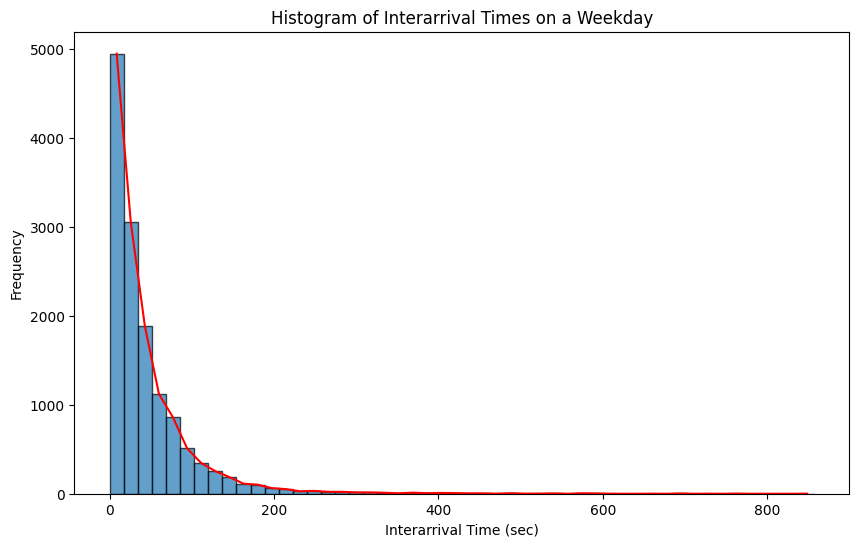

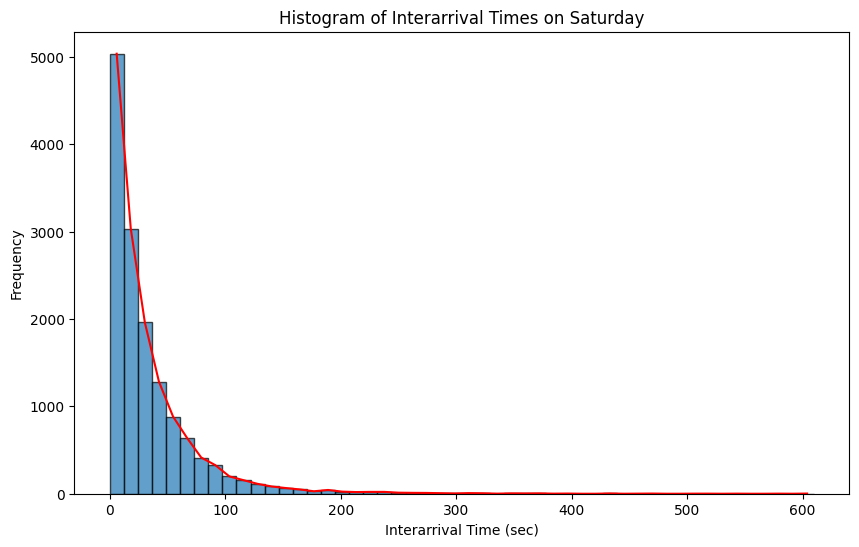

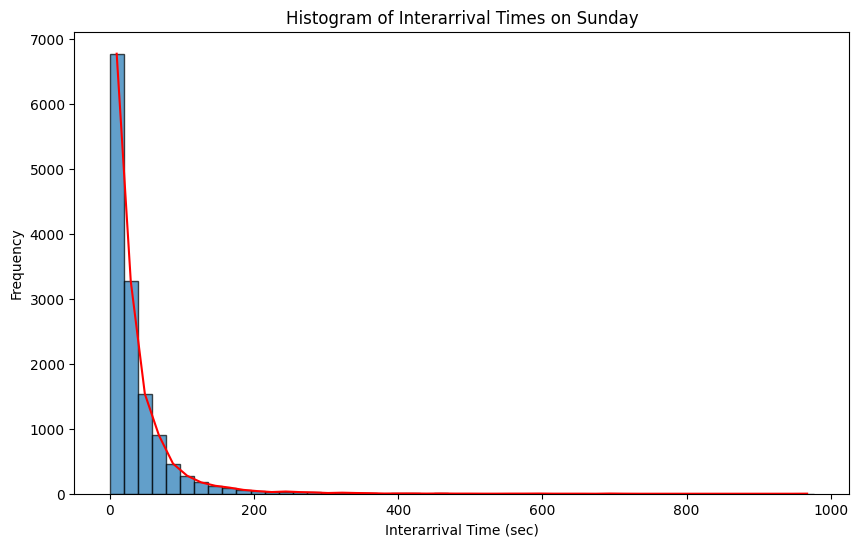

In [12]:

# Creating the histogram
def hist_maker(df, day):
    plt.figure(figsize=(10, 6))
    
    # Calculate histogram data
    counts, bin_edges = np.histogram(df['Interarrival Time (sec)'], bins=50)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])  # Calculate bin centers

    # Plot histogram
    plt.hist(df['Interarrival Time (sec)'], bins=50, edgecolor='black', alpha=0.7)

    # Plot line through the top of each bar
    plt.plot(bin_centers, counts, color='red', linestyle='-')  # Removed marker

    # Adding titles and labels
    plt.title(f'Histogram of Interarrival Times on {day}')
    plt.xlabel('Interarrival Time (sec)')
    plt.ylabel('Frequency')
    
    plt.savefig(f"interarrivals_{day}.png")
    plt.show()

hist_maker(weekday, "a Weekday")
hist_maker(saturday, "Saturday")
hist_maker(sunday, "Sunday")


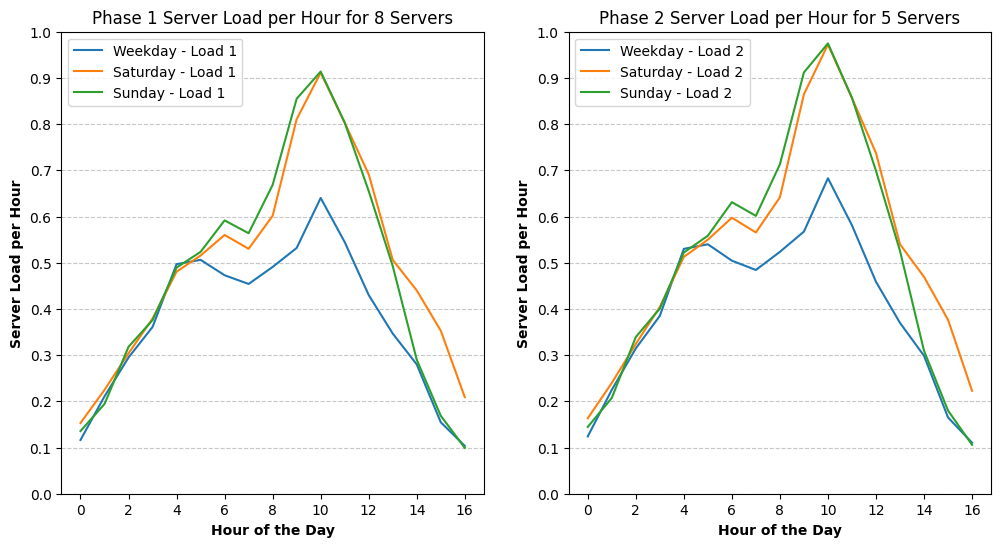

In [13]:
c1 = 8
c2 = 5
ES1 = 2.25
ES2 = 1.5

def load(df, c, ES):
    return (df['Lambda']/60)/(c*(1/ES))

# Create subplots for Phase 1 and Phase 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

days_of_week = ['Weekday', 'Saturday', 'Sunday']

# Plot for Phase 1
for i, df in enumerate([df_weekday, df_saturday, df_sunday]):
    df['Load1'] = load(df, c1, ES1)
    ax1.plot(df['Hour'], df['Load1'], label=f'{days_of_week[i]} - Load 1')

ax1.set_xlabel('Hour of the Day', fontweight='bold')
ax1.set_ylabel('Server Load per Hour', fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_title(f'Phase 1 Server Load per Hour for {c1} Servers')
ax1.legend()
ax1.set_ylim(0, 1)
ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Plot for Phase 2
for i, df in enumerate([df_weekday, df_saturday, df_sunday]):
    df['Load2'] = load(df, c2, ES2)
    ax2.plot(df['Hour'], df['Load2'], label=f'{days_of_week[i]} - Load 2')

ax2.set_xlabel('Hour of the Day', fontweight='bold')
ax2.set_ylabel('Server Load per Hour', fontweight='bold')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_title(f'Phase 2 Server Load per Hour for {c2} Servers')
ax2.legend()
ax2.set_ylim(0, 1)
ax2.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Save figures
plt.savefig("loads_phase1_and_phase2.png")

# Show the figures
plt.show()

In [14]:
def erlang_c(c, rho):
    p0 = 0
    for i in range(c):
        p0 += (c*rho)**i/math.factorial(i) + (c*rho)**c/math.factorial(c)*(1/(1-rho))
        
    pc = (c*rho)**c/(math.factorial(c) * p0)
    return pc/(1-rho)

def persons_in_system(df):
    L1s = []
    L2s = []
    for i in df['Hour']:
        rho1 = df['Load1'].iloc[i]
        rho2 = df['Load2'].iloc[i]
        L1 = (rho1*erlang_c(c1, rho1))/(1-rho1) + c1*rho1 #expected people in systems 
        L2 = (rho2*erlang_c(c2, rho2))/(1-rho2) + c2*rho2
        L1s.append(L1)
        L2s.append(L2)
    return L1s, L2s

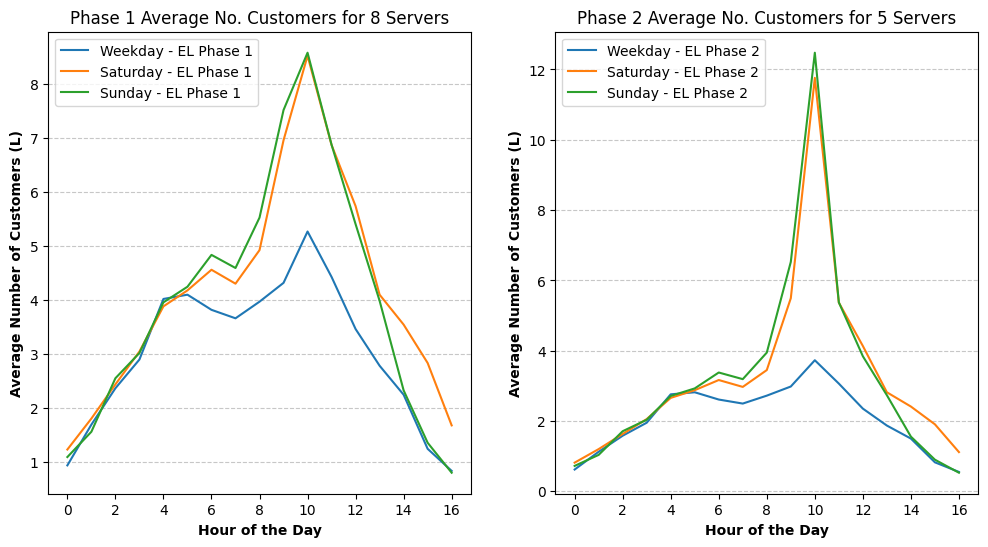

In [15]:
# Create subplots for Phase 1 and Phase 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

days_of_week = ['Weekday', 'Saturday', 'Sunday']

# Plot for Phase 1
for i, df in enumerate([df_weekday, df_saturday, df_sunday]):
    df['EL1'], df['EL2'] = persons_in_system(df)
    ax1.plot(df['Hour'], df['EL1'], label=f'{days_of_week[i]} - EL Phase 1')

ax1.set_xlabel('Hour of the Day', fontweight='bold')
ax1.set_ylabel('Average Number of Customers (L)', fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_title(f'Phase 1 Average No. Customers for {c1} Servers')
ax1.legend()

# Plot for Phase 2
for i, df in enumerate([df_weekday, df_saturday, df_sunday]):
    ax2.plot(df['Hour'], df['EL2'], label=f'{days_of_week[i]} - EL Phase 2')

ax2.set_xlabel('Hour of the Day', fontweight='bold')
ax2.set_ylabel('Average Number of Customers (L)', fontweight='bold')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_title(f'Phase 2 Average No. Customers for {c2} Servers')
ax2.legend()

# Save figures
plt.savefig("average_customers.png")

# Show the figures
plt.show()

In [16]:
def waiting_times(df):
    EW1s = []
    EW2s = []
    for i in df['Hour']:
        rho1 = df['Load1'].iloc[i]
        rho2 = df['Load2'].iloc[i]
        EW1 = (erlang_c(c1, rho1) / (1/c1*(1/ES1))) / (1-(rho1/c1))
        EW2 = (erlang_c(c2, rho2) / (1/c2*(1/ES2))) / (1-(rho2/c2))
        EW1s.append(EW1)
        EW2s.append(EW2)
    return EW1s, EW2s

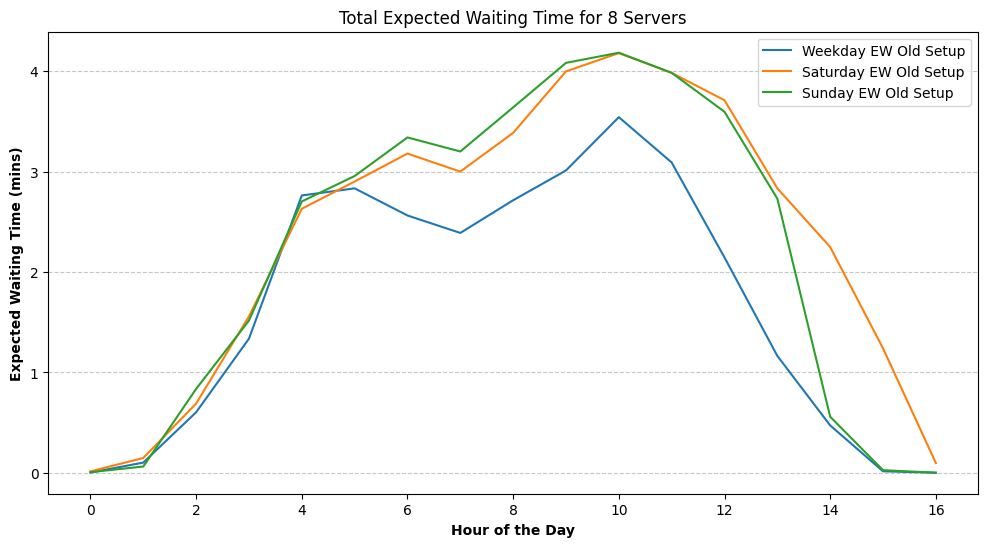

In [17]:
def waiting_times2(df, c, ES=3.25):
    EWs = []
    for i in df['Hour']:
        rho = df['Load_old'].iloc[i]
        EW = (erlang_c(c, rho) / (1/c*(1/ES))) / (1-(rho/c))
        EWs.append(EW)
    return EWs

c = 8

plt.figure(figsize=(12, 6))
for i, df in enumerate([df_weekday, df_saturday, df_sunday]):
    df['Load_old'] = load(df, c, ES=3.25)
    df['EW_old'] = waiting_times2(df, c)
    plt.plot(df['Hour'], df['EW_old'], label=f'{days_of_week[i]} EW Old Setup')
plt.xlabel('Hour of the Day', fontweight='bold')
plt.ylabel('Expected Waiting Time (mins)', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title(f'Total Expected Waiting Time for {c} Servers')
plt.legend()
plt.savefig(f'expected waiting time {c}.png')
plt.show()

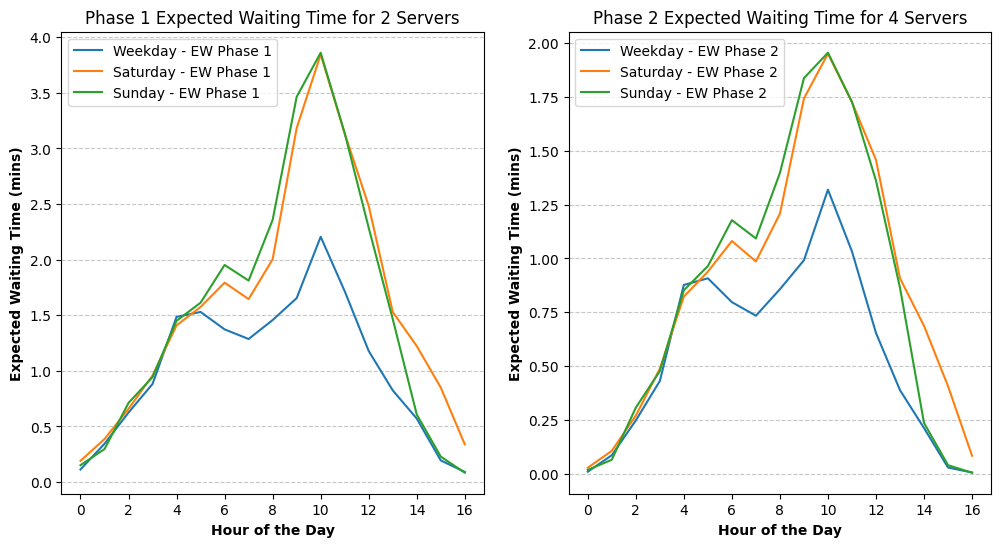

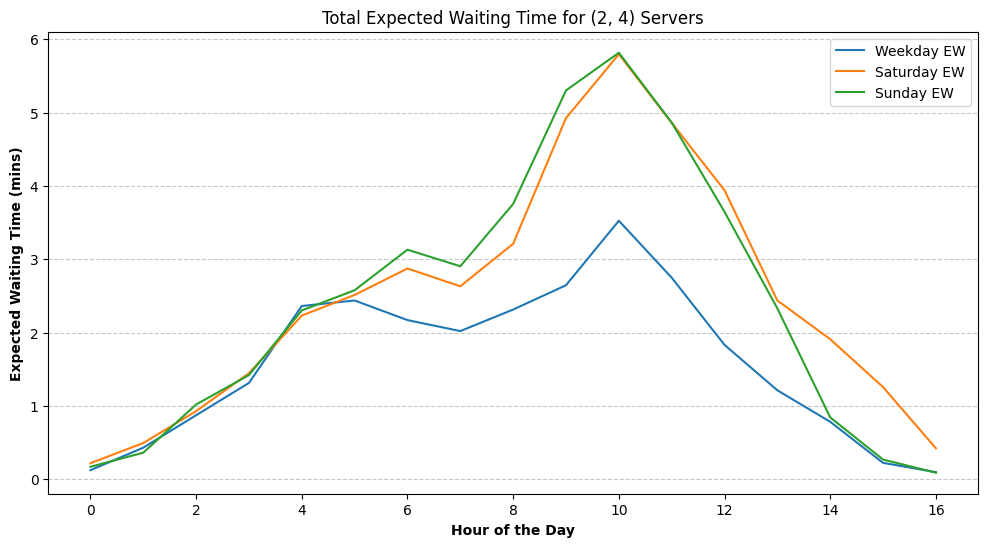

In [18]:
c1 = 2
c2 = 4

# Create subplots for Phase 1 and Phase 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

days_of_week = ['Weekday', 'Saturday', 'Sunday']

# Plot for Phase 1
for i, df in enumerate([df_weekday, df_saturday, df_sunday]):
    df['EW1'], df['EW2'] = waiting_times(df)
    df['EWtotal'] = df['EW1'] + df['EW2']
    ax1.plot(df['Hour'], df['EW1'], label=f'{days_of_week[i]} - EW Phase 1')

ax1.set_xlabel('Hour of the Day', fontweight='bold')
ax1.set_ylabel('Expected Waiting Time (mins)', fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_title(f'Phase 1 Expected Waiting Time for {c1} Servers')
ax1.legend()

# Plot for Phase 2
for i, df in enumerate([df_weekday, df_saturday, df_sunday]):
    ax2.plot(df['Hour'], df['EW2'], label=f'{days_of_week[i]} - EW Phase 2')

ax2.set_xlabel('Hour of the Day', fontweight='bold')
ax2.set_ylabel('Expected Waiting Time (mins)', fontweight='bold')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_title(f'Phase 2 Expected Waiting Time for {c2} Servers')
ax2.legend()

# Save figures
plt.savefig("average_customers.png")

# Show the figures
plt.show()

plt.figure(figsize=(12, 6))
for i, df in enumerate([df_weekday, df_saturday, df_sunday]):
    plt.plot(df['Hour'], df['EWtotal'], label=f'{days_of_week[i]} EW')
plt.xlabel('Hour of the Day', fontweight='bold')
plt.ylabel('Expected Waiting Time (mins)', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title(f'Total Expected Waiting Time for ({c1}, {c2}) Servers')
plt.legend()
plt.savefig(f'expected waiting time ({c1},{c2}).png')
plt.show()

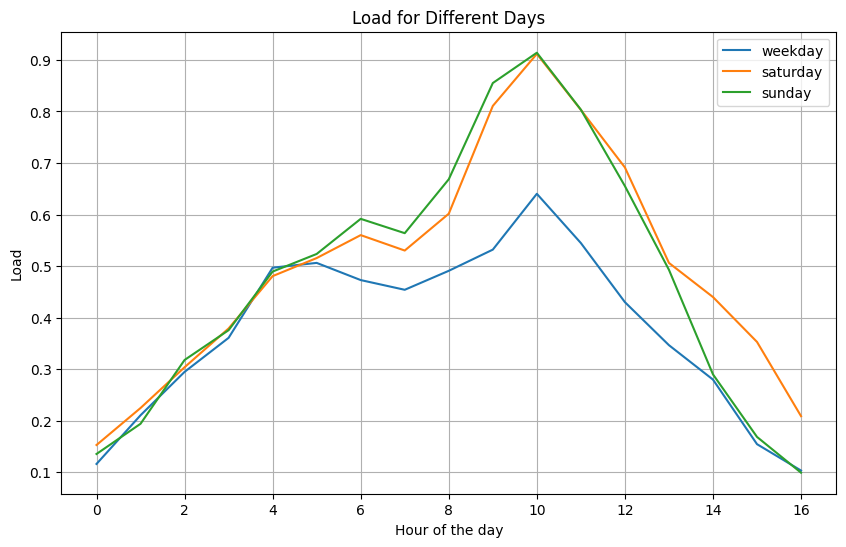

,Hour,Lambda,Load,c
0,0,24.812424,0.116308,8
1,1,44.961073,0.210755,8
2,2,62.902152,0.294854,8
3,3,76.985743,0.360871,8
4,4,106.000111,0.496876,8
5,5,107.988950,0.506198,8
6,6,100.881424,0.472882,8
7,7,96.864131,0.454051,8
8,8,104.716746,0.490860,8
9,9,113.478478,0.531930,8


In [93]:
#old method

# Convert the dictionaries to DataFrames
df_weekday = pd.DataFrame(list(lambdas_weekday.items()), columns=['Hour', 'Lambda'])
df_saturday = pd.DataFrame(list(lambdas_saturday.items()), columns=['Hour', 'Lambda'])
df_sunday = pd.DataFrame(list(lambdas_sunday.items()), columns=['Hour', 'Lambda'])

# Ensure hours are aligned
hours = sorted(set(df_weekday['Hour']) | set(df_saturday['Hour']) | set(df_sunday['Hour']))
df_weekday = df_weekday.set_index('Hour').reindex(hours).reset_index()
df_saturday = df_saturday.set_index('Hour').reindex(hours).reset_index()
df_sunday = df_sunday.set_index('Hour').reindex(hours).reset_index()

df_weekday['Lambda'] = df_weekday['Lambda']*60*60
df_saturday['Lambda'] = df_saturday['Lambda']*60*60
df_sunday['Lambda'] = df_sunday['Lambda']*60*60

ES = 3.25

cost = 15

#load < 1
# c = {
#     "weekday": {0:4,1:4,2:4,3:5,4:6,5:6,6:6,7:6,8:7,9:7,10:8,11:8,12:5,13:5,14:4,15:3,16:2},
#     "saturday": {0:4,1:4,2:4,3:5,4:6,5:7,6:8,7:7,8:8,9:10,10:11,11:10,12:9,13:7,14:6,15:5,16:3},
#     "sunday": {0:4,1:4,2:4,3:5,4:6,5:7,6:8,7:7,8:8,9:10,10:11,11:10,12:9,13:7,14:4,15:3,16:2}
# }

#load > 1
c = {
    "weekday": {0:4,1:4,2:4,3:5,4:6,5:6,6:6,7:6,8:7,     9:3,10:4,11:3,       12:5,13:5,14:4,15:3,16:2},
    "saturday": {0:4,1:4,2:4,3:5,4:6,5:7,6:8,7:7,8:8,    9:4,10:4,11:4,    12:9,13:7,14:6,15:5,16:3},
    "sunday": {0:4,1:4,2:4,3:5,4:6,5:7,6:8,7:7,8:8,      9:4,10:4,11:4,    12:9,13:7,14:4,15:3,16:2}
}

#all 8
# c = {
#     "weekday": {0:8,1:8,2:8,3:8,4:8,5:8,6:8,7:8,8:8,     9:8,10:8,11:8,       12:8,13:8,14:8,15:8,16:8},
#     "saturday": {0:8,1:8,2:8,3:8,4:8,5:8,6:8,7:8,8:8,    9:8,10:8,11:8,    12:8,13:8,14:8,15:8,16:8},
#     "sunday": {0:8,1:8,2:8,3:8,4:8,5:8,6:8,7:8,8:8,      9:8,10:8,11:8,    12:8,13:8,14:8,15:8,16:8}
# }

weekday_cost = sum(c["weekday"].values())*cost
saturday_cost = sum(c["saturday"].values())*cost
sunday_cost = sum(c["sunday"].values())*cost

def calculate_c(c_dict, df_type, hour):
    # Define a function to retrieve 'c' based on the dataframe type and hour from the dictionary
    return c_dict[df_type][hour]

for df_type, df in [("weekday", df_weekday), ("saturday", df_saturday), ("sunday", df_sunday)]:
    # Assuming your dataframe has a column named 'Hour' representing the hour of the day
    df["Load"] = df.apply(lambda row: load(row, calculate_c(c, df_type, row['Hour']), ES), axis=1)

# Convert 'c' dictionary to DataFrames and add 'c' as a column in each dataframe
for df, c_value in zip([df_weekday, df_saturday, df_sunday], [c["weekday"], c["saturday"], c["sunday"]]):
    df['c'] = df['Hour'].map(c_value)
    
# Plotting 'Load' values for all three dataframes in a single figure
plt.figure(figsize=(10, 6))  # Set the figure size
for df_type, df in [("weekday", df_weekday), ("saturday", df_saturday), ("sunday", df_sunday)]:
    plt.plot(df['Hour'], df['Load'], label=df_type)  # Plot 'Load1' against 'Hour' for each dataframe

plt.xlabel('Hour of the day')
plt.ylabel('Load')
plt.title('Load for Different Days')
plt.legend()
plt.grid(True)
plt.show()

df_weekday

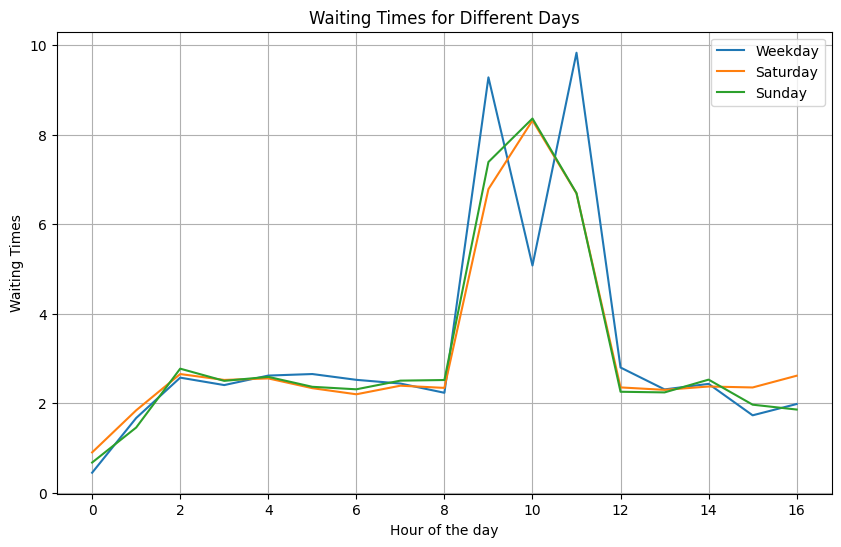

In [84]:
def waiting_times(df):
    EW = []
    for i in df.index:
        rho = df.at[i, 'Load']
        c_real = df.at[i, 'c']
        EW1 = (erlang_c(c_real, rho) / (1 / c_real * (1 / ES1))) / (1 - (rho / c_real))
        EW.append(EW1)
    return EW

waiting_times_weekday = waiting_times(df_weekday)
waiting_times_saturday = waiting_times(df_saturday)
waiting_times_sunday = waiting_times(df_sunday)

# Plotting waiting times for all three dataframes in a single figure
plt.figure(figsize=(10, 6))  # Set the figure size

plt.plot(df_weekday['Hour'], waiting_times_weekday, label='Weekday')
plt.plot(df_saturday['Hour'], waiting_times_saturday, label='Saturday')
plt.plot(df_sunday['Hour'], waiting_times_sunday, label='Sunday')

plt.xlabel('Hour of the day')
plt.ylabel('Waiting Times')
plt.title('Waiting Times for Different Days')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
print(weekday_cost,saturday_cost,sunday_cost)

1155 1425 1350


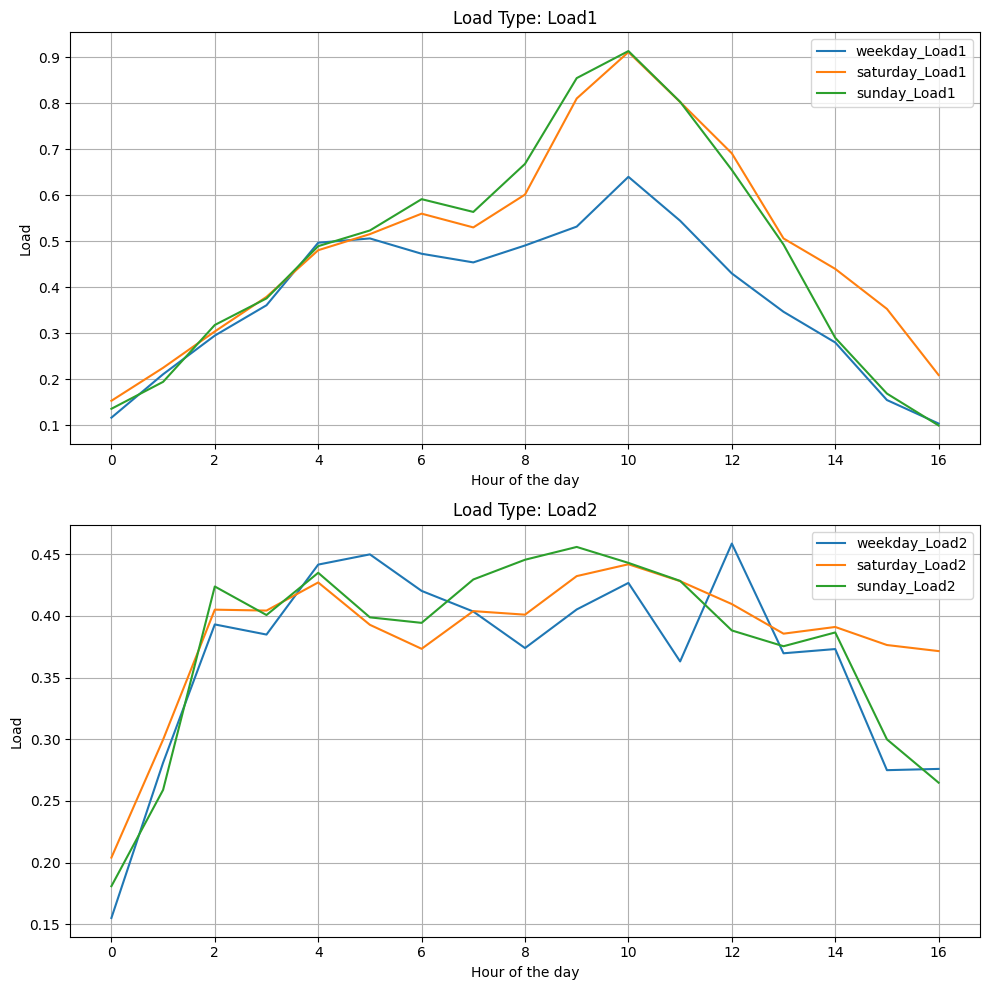

,Hour,Lambda,Load1,Load2,c2
0,0,24.812424,0.116308,0.155078,4
1,1,44.961073,0.210755,0.281007,4
2,2,62.902152,0.294854,0.393138,4
3,3,76.985743,0.360871,0.384929,5
4,4,106.000111,0.496876,0.441667,6
5,5,107.988950,0.506198,0.449954,6
6,6,100.881424,0.472882,0.420339,6
7,7,96.864131,0.454051,0.403601,6
8,8,104.716746,0.490860,0.373988,7
9,9,113.478478,0.531930,0.405280,7


In [99]:
#new method
# Convert the dictionaries to DataFrames
df_weekday = pd.DataFrame(list(lambdas_weekday.items()), columns=['Hour', 'Lambda'])
df_saturday = pd.DataFrame(list(lambdas_saturday.items()), columns=['Hour', 'Lambda'])
df_sunday = pd.DataFrame(list(lambdas_sunday.items()), columns=['Hour', 'Lambda'])

# Ensure hours are aligned
hours = sorted(set(df_weekday['Hour']) | set(df_saturday['Hour']) | set(df_sunday['Hour']))
df_weekday = df_weekday.set_index('Hour').reindex(hours).reset_index()
df_saturday = df_saturday.set_index('Hour').reindex(hours).reset_index()
df_sunday = df_sunday.set_index('Hour').reindex(hours).reset_index()

df_weekday['Lambda'] = df_weekday['Lambda']*60*60
df_saturday['Lambda'] = df_saturday['Lambda']*60*60
df_sunday['Lambda'] = df_sunday['Lambda']*60*60

ES1 = 2.25
ES2 = 1.5
cost = 15
c1 = 8
#load < 1
c = {
    "weekday": {0:4,1:4,2:4,3:5,4:6,5:6,6:6,7:6,8:7,9:7,10:8,11:8,12:5,13:5,14:4,15:3,16:2},
    "saturday": {0:4,1:4,2:4,3:5,4:6,5:7,6:8,7:7,8:8,9:10,10:11,11:10,12:9,13:7,14:6,15:5,16:3},
    "sunday": {0:4,1:4,2:4,3:5,4:6,5:7,6:8,7:7,8:8,9:10,10:11,11:10,12:9,13:7,14:4,15:3,16:2}
}

# #load > 1
# c = {
#     "weekday": {0:4,1:4,2:4,3:5,4:6,5:6,6:6,7:6,8:7,     9:3,10:4,11:3,       12:5,13:5,14:4,15:3,16:2},
#     "saturday": {0:4,1:4,2:4,3:5,4:6,5:7,6:8,7:7,8:8,    9:4,10:4,11:4,    12:9,13:7,14:6,15:5,16:3},
#     "sunday": {0:4,1:4,2:4,3:5,4:6,5:7,6:8,7:7,8:8,      9:4,10:4,11:4,    12:9,13:7,14:4,15:3,16:2}
# }

weekday_cost = sum(c["weekday"].values())*cost
saturday_cost = sum(c["saturday"].values())*cost
sunday_cost = sum(c["sunday"].values())*cost

def calculate_c(c_dict, df_type, hour):
    # Define a function to retrieve 'c' based on the dataframe type and hour from the dictionary
    return c_dict[df_type][hour]

for df_type, df in [("weekday", df_weekday), ("saturday", df_saturday), ("sunday", df_sunday)]:
    # Assuming your dataframe has a column named 'Hour' representing the hour of the day
    df["Load1"] = load(df, c1, ES1)
    df["Load2"] = df.apply(lambda row: load(row, calculate_c(c, df_type, row['Hour']), ES2), axis=1)

# Convert 'c' dictionary to DataFrames and add 'c' as a column in each dataframe
for df, c_value in zip([df_weekday, df_saturday, df_sunday], [c["weekday"], c["saturday"], c["sunday"]]):
    df['c2'] = df['Hour'].map(c_value)
    
# Plotting 'Load' values for all three dataframes in a single figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))  # Create subplots for Load1 and Load2

load_types = ['Load1', 'Load2']

for i, load_type in enumerate(load_types):
    ax = axes[i]  # Select the current subplot
    for df_type, df in [("weekday", df_weekday), ("saturday", df_saturday), ("sunday", df_sunday)]:
        ax.plot(df['Hour'], df[load_type], label=f'{df_type}_{load_type}')  # Plot load_type against 'Hour' for each dataframe

    ax.set_xlabel('Hour of the day')
    ax.set_ylabel('Load')
    ax.set_title(f'Load Type: {load_type}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()  # Adjust subplot layout for better appearance
plt.show()

df_weekday



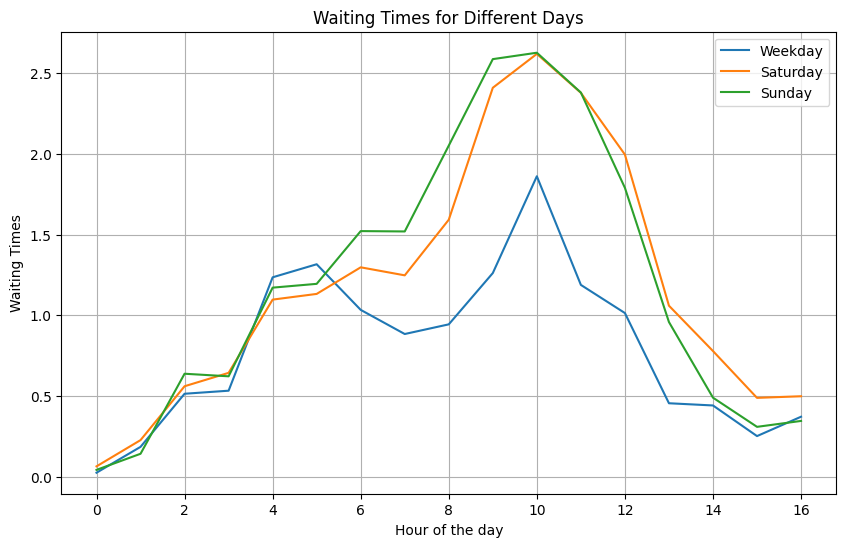

1350 1710 1635


In [97]:
def waiting_times(df):
    EW = []
    for i in df.index:
        rho1 = df.at[i, 'Load1']
        rho2 = df.at[i, 'Load2']
        c2 = df.at[i, 'c2']
        EW1 = (erlang_c(c1, rho1) / (1 / c1 * (1 / ES1))) / (1 - (rho1 / c1))
        EW2 = (erlang_c(c2, rho2) / (1 / c2 * (1 / ES2))) / (1 - (rho2 / c2))
        EW.append(EW1+EW2)
    return EW

waiting_times_weekday = waiting_times(df_weekday)
waiting_times_saturday = waiting_times(df_saturday)
waiting_times_sunday = waiting_times(df_sunday)

# Plotting waiting times for all three dataframes in a single figure
plt.figure(figsize=(10, 6))  # Set the figure size

plt.plot(df_weekday['Hour'], waiting_times_weekday, label='Weekday')
plt.plot(df_saturday['Hour'], waiting_times_saturday, label='Saturday')
plt.plot(df_sunday['Hour'], waiting_times_sunday, label='Sunday')

plt.xlabel('Hour of the day')
plt.ylabel('Waiting Times')
plt.title('Waiting Times for Different Days')
plt.legend()
plt.grid(True)
plt.show()

print(weekday_cost,saturday_cost,sunday_cost)